<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Multivariate Analysis

### Initializations

In [2]:
# Bibliotheken einbinden
import itertools
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [4]:
df = pd.read_pickle('exchange/hr_01_cleaned_train.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 10 columns):
satisfactionLevel       11999 non-null float64
yearsSinceEvaluation    11999 non-null float64
numberOfProjects        11999 non-null int64
averageMonthlyHours     11999 non-null int64
yearsAtCompany          11999 non-null int64
workAccident            11999 non-null category
hasLeftCompany          11999 non-null category
gotPromotion            11999 non-null category
department              11999 non-null category
salary                  11999 non-null category
dtypes: category(5), float64(2), int64(3)
memory usage: 527.5 KB


In [5]:
# Boxplot des Zusammenhangs von einem Attribut zu jeweils mehreren anderen auf bestimmte Zielgröße
def boxplot_multivariat(one, many, target):
    f, a = plt.subplots(len(many), 1, figsize=(16,6*len(many)))
    a = a.ravel()
    for idx, col in enumerate(many):
        sns.boxplot(x=one, y=col, hue=target, data=df, ax=a[idx])
        a[idx].set(ylabel=col)
        a[idx].set_xlabel(one, weight='bold')

In [6]:
# LMPlot des Zusammenhangs von jeder 2-er Kombination mehrerer Attribute auf bestimmte Zielgröße
def lmplot_combinations(attributes, target):
    c = list(itertools.combinations(attributes, 2))
    for idx, col in enumerate(c):
        sns.lmplot(x=col[0], y=col[1], hue=target, fit_reg=False, data=df)

### Boxplot for Turnover depending on Number of Projects vs. Other Number Features

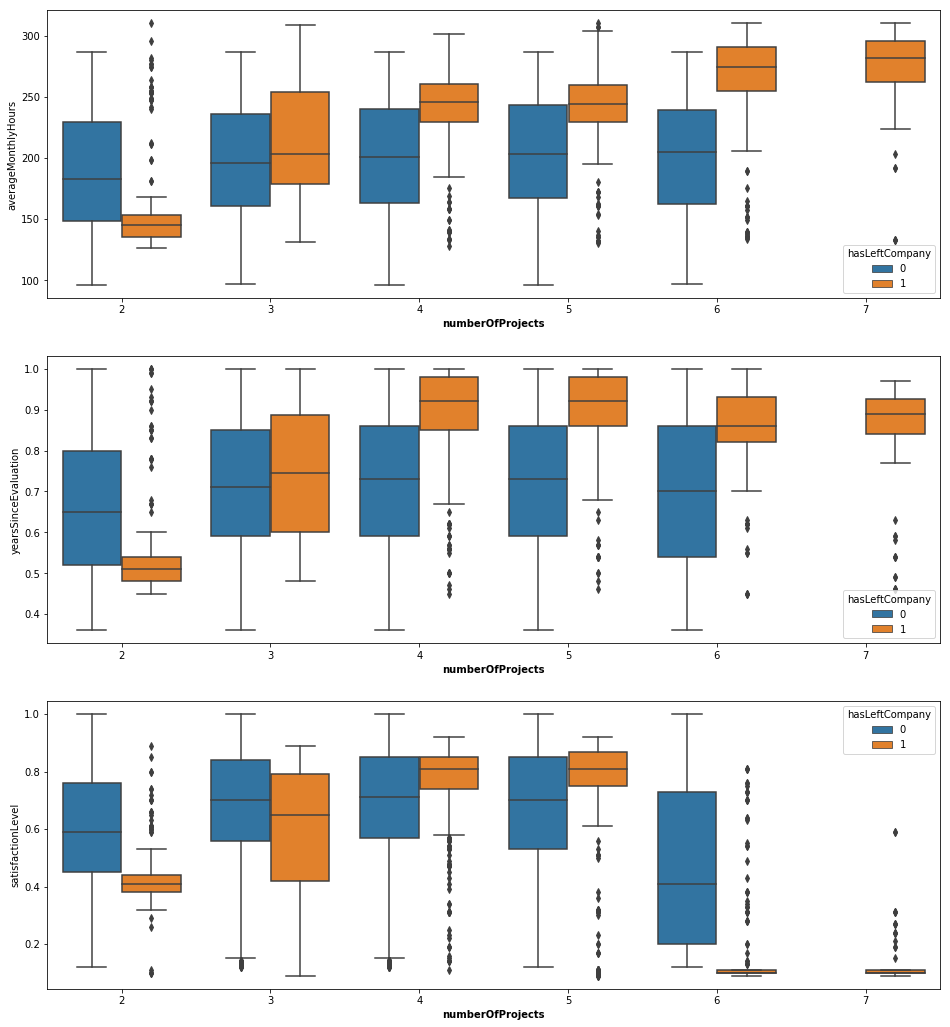

In [16]:
boxplot_multivariat('numberOfProjects', ['averageMonthlyHours', 'yearsSinceEvaluation', 'satisfactionLevel'], 'hasLeftCompany')

### Boxplot for Turnover depending on Years at Company vs. Other Number Features

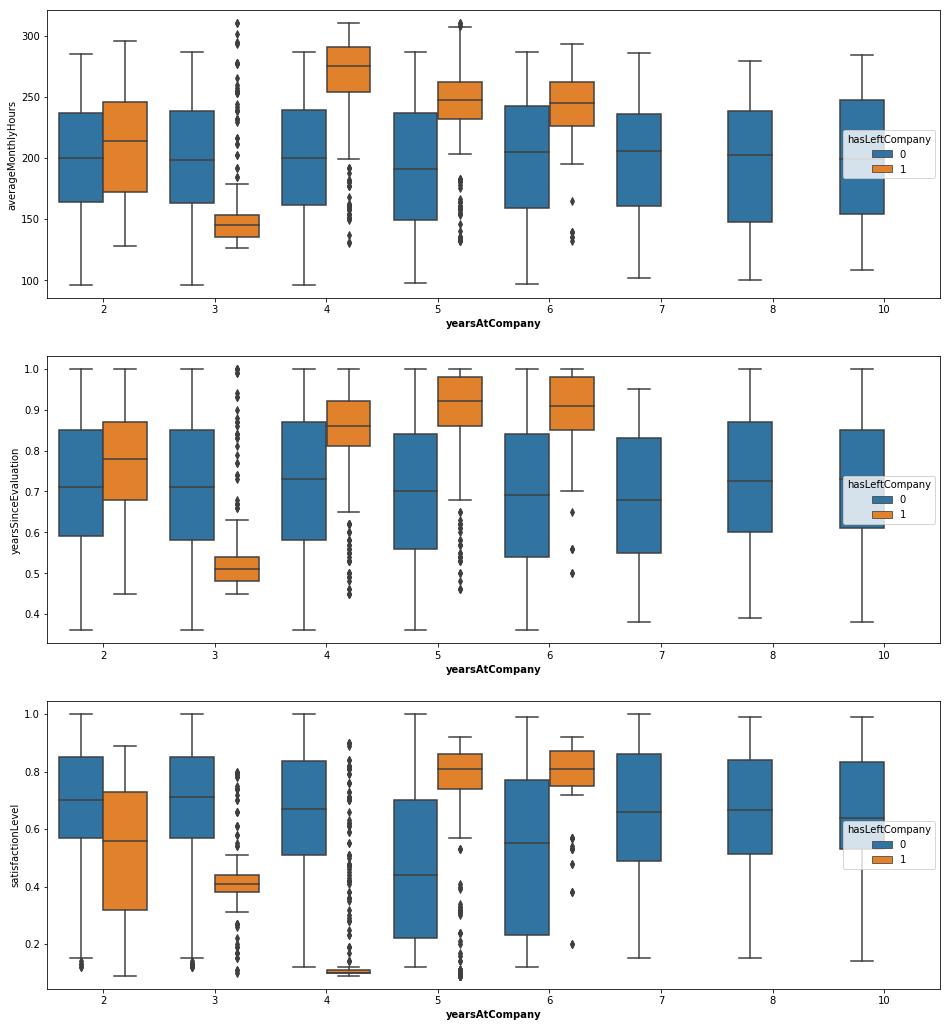

In [17]:
boxplot_multivariat('yearsAtCompany', ['averageMonthlyHours', 'yearsSinceEvaluation', 'satisfactionLevel'], 'hasLeftCompany')

### Boxplot for Turnover depending on Department vs. Other Number Features

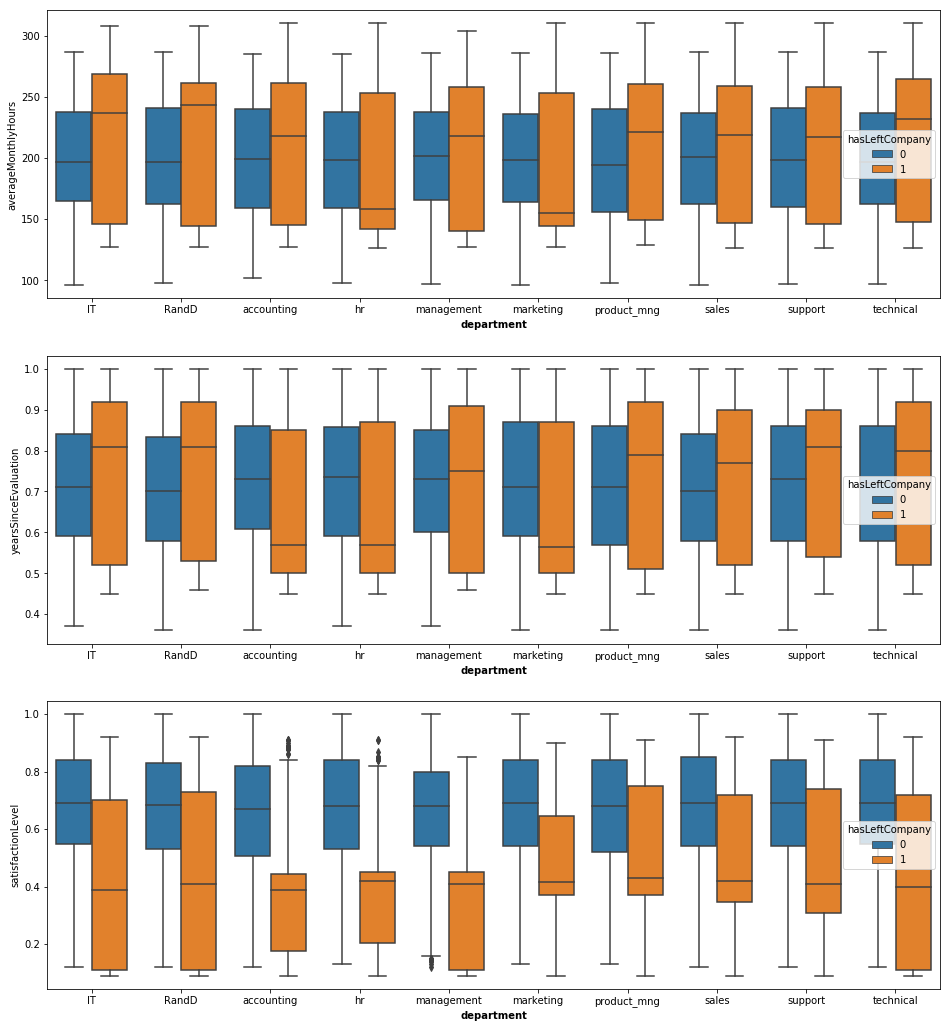

In [8]:
boxplot_multivariat('department', ['averageMonthlyHours', 'yearsSinceEvaluation', 'satisfactionLevel'], 'hasLeftCompany')

### LMPlot for Number Attributes with many distinct Values

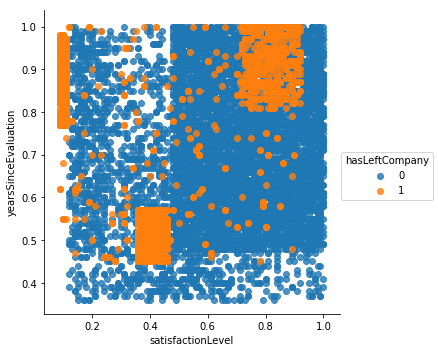

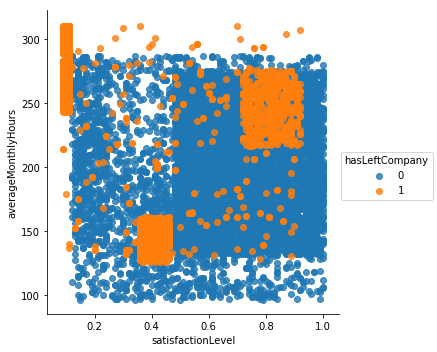

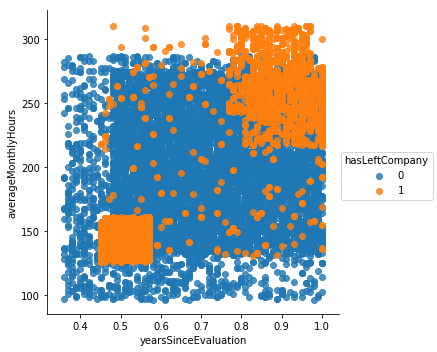

In [49]:
lmplot_combinations(['satisfactionLevel', 'yearsSinceEvaluation', 'averageMonthlyHours'], 'hasLeftCompany')